          t    x    y    z
0         0    0    0  0.0
1         0    2    0  0.0
2         0    4    0  0.0
3         0    6    0  0.0
4         0    8    0  0.0
...     ...  ...  ...  ...
522796  200   92  100  0.0
522797  200   94  100  0.0
522798  200   96  100  0.0
522799  200   98  100  0.0
522800  200  100  100  0.0

[522801 rows x 4 columns]
tmax 200


<IPython.core.display.Javascript object>


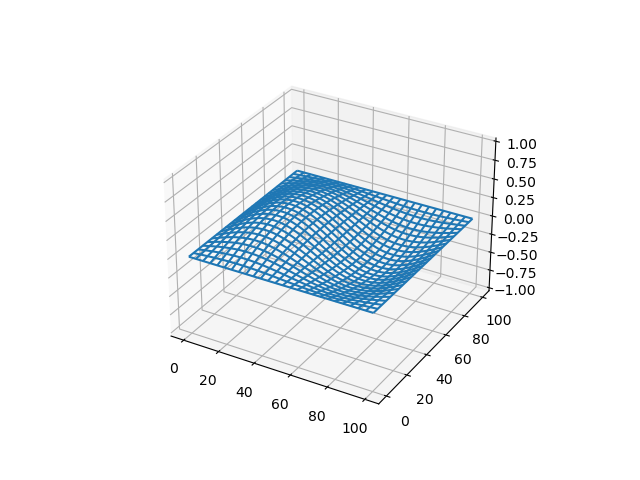

In [1]:
# This reads a csv file using pandas dataframe
# and copy data to numpy arrays to make a plot.
# animation from
# https://matplotlib.org/2.0.2/examples/animation/simple_anim.html
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

# Enable interactive plot
%matplotlib notebook

df = pd.read_csv('wave2Dfull.csv')
print(df)

t=(df["t"].to_numpy())
x=(df["x"].to_numpy())
y=(df["y"].to_numpy())
z=(df["z"].to_numpy())

tmax=np.amax(t)
print("tmax",tmax)

#  fetch data for time==0
tfilt= t==0      # filter for t==0 
xval=x[tfilt]
yval=y[tfilt]
zval=z[tfilt]

xval2d=xval.reshape((51,51))
yval2d=yval.reshape((51,51))
zval2d=zval.reshape((51,51))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#line, =ax.plot_wireframe(xval2d,yval2d,zval2d)
line=None

def animate(i):
    global line
    global xval2d,yval2d    # keep using same x-y grid
    global z                # full set of z vlaues

    it=i
    tfilt= t==it
    zval=z[tfilt]
    zval2d=zval.reshape((51,51))
    if line:
        ax.collections.remove(line)    # clear previous image
    line=ax.plot_wireframe(xval2d,yval2d,zval2d)
    return line

def init():
    global line
    print("ini")
    if line:
        ax.collections.remove(line)
    line=ax.plot_wireframe(xval2d,yval2d,zval2d)
    return line

ax.set_zlim3d([-1.0,1.0])
ani=animation.FuncAnimation(fig,animate,np.arange(0,tmax),init_func=init,interval=200,blit=False)

# plt.savefig('plot_2dwave_t1.png')
plt.show()
